Task 1: Apply BFS and DFS on trees and graphs. You can use simple examples for your practice. 
For graph editor you can use this: https://csacademy.com/app/graph_editor/ 

In [1]:
from collections import deque

# Define the graph as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# BFS implementation
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    bfs_order = []

    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            bfs_order.append(vertex)
            queue.extend(neighbor for neighbor in graph[vertex] if neighbor not in visited)
    
    return bfs_order

# DFS implementation
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    dfs_order.append(start)

    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    
    return dfs_order

# Perform BFS and DFS
bfs_order = bfs(graph, 'A')
dfs_order = []
dfs(graph, 'A')

print("BFS Order:", bfs_order)
print("DFS Order:", dfs_order)

BFS Order: ['A', 'B', 'C', 'D', 'E', 'F']
DFS Order: ['A', 'B', 'D', 'E', 'F', 'C']


Task 2 
 1. Generate random and unique numbers of ranges 1000,40,000,80,000,200,000 and 
1,000,000. So now you have 5 sets of inputs, build the tree for each set (each set has a its own 
list)  
2. Apply BFS and DFS on each set and calculate the time taken for the execution to find that 
goal through BFS and DFS. 
 3. Goal should be lis[total_len – 220] 
 4. Make a data frame for your results as shown below 
 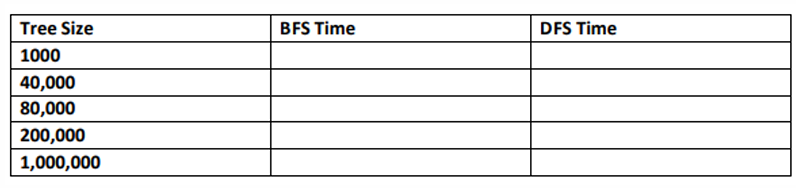
 
5. Finally plot the bar chart of the time taken by each search for example (on X-axis the data will 
be 1000,40,000,80,000,200,000 and 1,000,000.) and on the Y axis the data will be the seconds it 
took while searching. 

In [5]:
pip install matplotlib

  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     Range  BFS Time  DFS Time
0     1000       0.0       0.0
1    40000       0.0       0.0
2    80000       0.0       0.0
3   200000       0.0       0.0
4  1000000       0.0       0.0


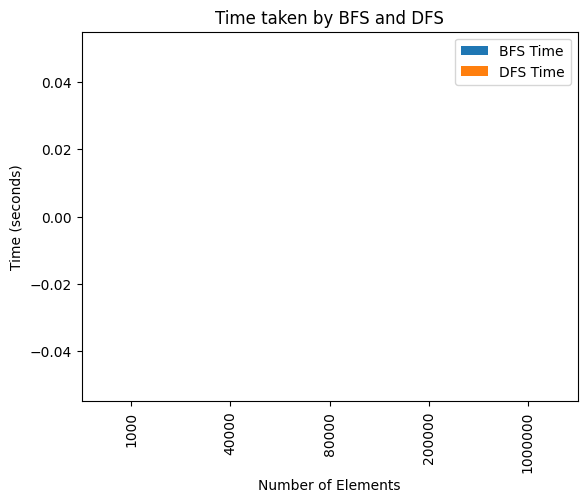

In [9]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

# Generate random and unique numbers for the specified ranges
ranges = [1000, 40000, 80000, 200000, 1000000]
sets = {r: random.sample(range(r * 10), r) for r in ranges}

# Function to build a tree from a list of numbers
def build_tree(numbers):
    tree = {}
    for number in numbers:
        tree[number] = []
    for number in numbers:
        if number * 2 in tree:
            tree[number].append(number * 2)
        if number * 2 + 1 in tree:
            tree[number].append(number * 2 + 1)
    return tree

# BFS implementation
def bfs(graph, start):
    visited = []
    queue = [start]
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            queue.extend([n for n in graph[node] if n not in visited])
    return visited

# DFS implementation
def dfs(graph, start, visited=None):
    if visited is None:
        visited = []
    visited.append(start)
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    return visited

# Function to measure the time taken by BFS and DFS
def measure_time(graph, start, goal):
    start_time = time.time()
    bfs_order = bfs(graph, start)
    bfs_time = time.time() - start_time

    start_time = time.time()
    dfs_order = dfs(graph, start)
    dfs_time = time.time() - start_time

    return bfs_time, dfs_time

# Apply BFS and DFS on each set and calculate the time taken
results = []
for r in ranges:
    numbers = sets[r]
    tree = build_tree(numbers)
    goal = numbers[-220]
    bfs_time, dfs_time = measure_time(tree, numbers[0], goal)
    results.append((r, bfs_time, dfs_time))

# Create a data frame for the results
df_results = pd.DataFrame(results, columns=['Range', 'BFS Time', 'DFS Time'])
print(df_results)

# Plot the bar chart of the time taken by each search
df_results.plot(x='Range', y=['BFS Time', 'DFS Time'], kind='bar')
plt.xlabel('Number of Elements')
plt.ylabel('Time (seconds)')
plt.title('Time taken by BFS and DFS')
plt.show()